In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import folium
import folium.plugins as plugins
from folium.features import ClickForMarker
from folium.plugins import HeatMap
from branca.element import Template, MacroElement

In [3]:
df = pd.read_csv('ny_clean_all.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882148 entries, 0 to 6882147
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   year               int64  
 2   month              int64  
 3   day                int64  
 4   weekday            object 
 5   hour               int64  
 6   Latitude           float64
 7   Longitude          float64
 8   CRM_ATPT_CPTD_CD   object 
 9   OFNS_DESC          object 
 10  ADDR_PCT_CD        float64
 11  CRIME_CLASS        object 
 12  BORO_NM            object 
 13  PREM_TYP_DESC      object 
 14  IN_PARK            int64  
 15  IN_PUBLIC_HOUSING  int64  
 16  IN_STATION         int64  
 17  SUSP_AGE_GROUP     object 
 18  SUSP_RACE          object 
 19  SUSP_SEX           object 
 20  VIC_AGE_GROUP      object 
 21  VIC_RACE           object 
 22  VIC_SEX            object 
dtypes: float64(3), int64(8), object(12)
memory usage: 1.2+ GB


# What

C:\Users\HP\AppData\Local\Temp\ipykernel_21148\1287556633.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x='CRIME_CLASS',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])
C:\Users\HP\AppData\Local\Temp\ipykernel_21148\1287556633.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g=sns.barplot(x='CRIME_CLASS',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])


Text(0.5, 1.0, 'Crime type distribution')

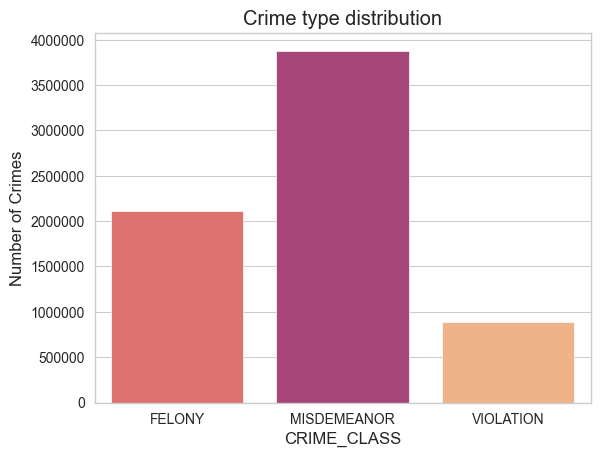

In [5]:
# Crimes type
df2=df.groupby(['CRIME_CLASS'])['CMPLNT_NUM'].count().reset_index()
# plotting number of offences per offence level
sns.set_style('whitegrid')
palette = sns.color_palette("magma",5)
data = df.groupby(['CRIME_CLASS'])['CMPLNT_NUM'].size()
rank = data.argsort().argsort()
# plotting
g=sns.barplot(x='CRIME_CLASS',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])
#g=(g.set_axis_labels("Year","Number of Offences"))
plt.ylabel('Number of Crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Crime type distribution")

Text(0.5, 1.0, 'crime success rate')

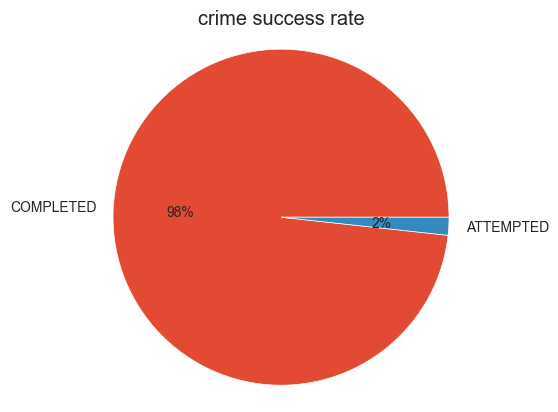

In [6]:
# Successful crime rate
plt.pie(df['CRM_ATPT_CPTD_CD'].value_counts(normalize=True).round(4),labels=df['CRM_ATPT_CPTD_CD'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

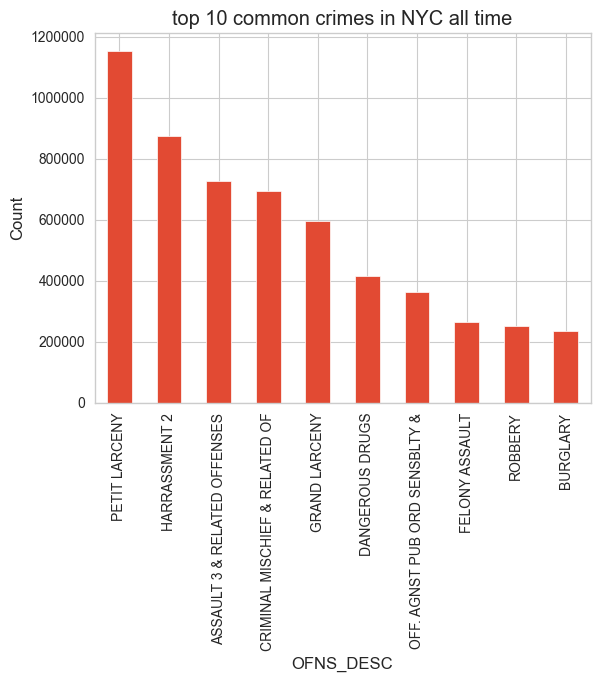

In [7]:
# top 10 common crimes in NYC all time 
df['OFNS_DESC'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('top 10 common crimes in NYC all time')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

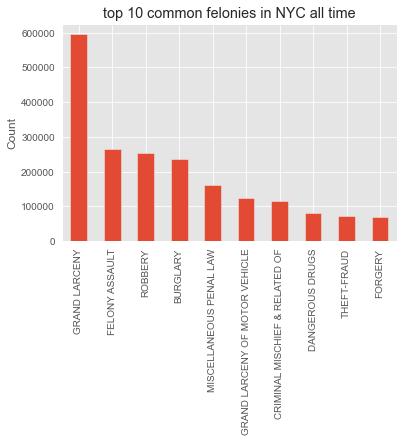

In [88]:
# top 10 common felonies in NYC all time 
df[df['CRIME_CLASS']=='FELONY']['OFNS_DESC'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('top 10 common felonies in NYC all time')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Victim distribution by age')

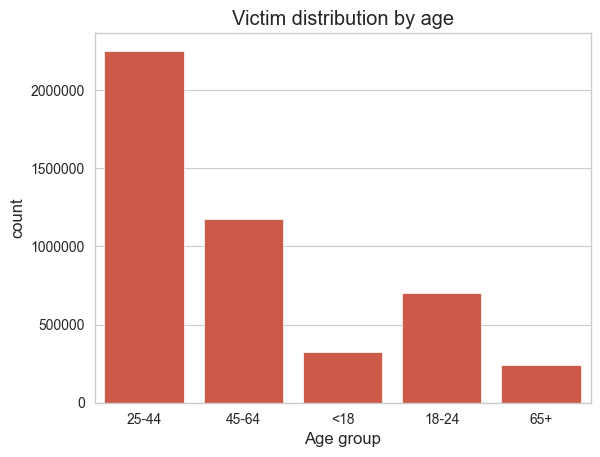

In [8]:
# Victim Age distribution
x = df[(df['VIC_AGE_GROUP'] !='UNKNOWN')] # filter only person victims not institutions..
sns.countplot(x=x['VIC_AGE_GROUP'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Age group')
plt.ylabel('count')
plt.title('Victim distribution by age')

Text(0.5, 1.0, 'Victim distribution by sex')

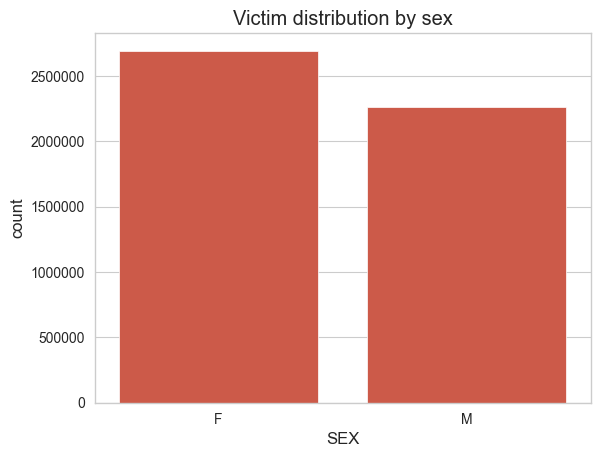

In [9]:
# Victim sex distribution
x = df[(df['VIC_SEX']=='M') | (df['VIC_SEX']=='F')] # filter only person victims not institutions..
sns.countplot(x=x['VIC_SEX'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('SEX')
plt.ylabel('count')
plt.title('Victim distribution by sex')

Text(0.5, 1.0, 'Victim distribution by race')

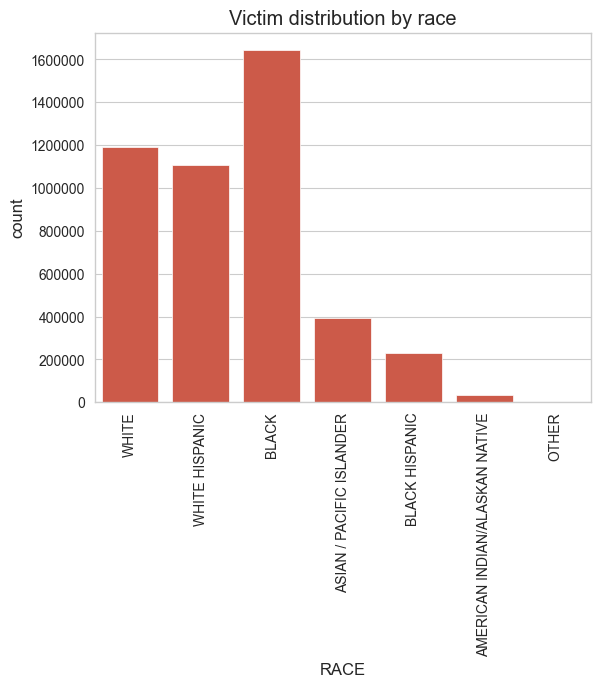

In [10]:
# Victim race distribution
x = df[(df['VIC_RACE']!='UNKNOWN')] # filter only person victims not institutions..
sns.countplot(x=x['VIC_RACE'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('RACE')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Victim distribution by race')

## Plots

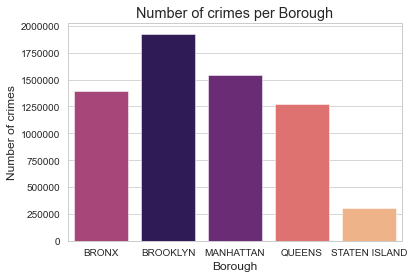

In [20]:
#plotting number of crimes per borough
df2 = df[df['BORO_NM']!='UNKNOWN'].groupby(['BORO_NM'])['CMPLNT_NUM'].count().reset_index()
# configure color palette to depend on values
data = df[df['BORO_NM']!='UNKNOWN'].groupby(['BORO_NM'])['CMPLNT_NUM'].size() 
palette = sns.color_palette("magma",5)
rank = data.argsort().argsort()
# plotting
g=sns.barplot(x='BORO_NM',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank]);
plt.xlabel('Borough')
plt.ylabel('Number of crimes');
plt.ticklabel_format(style='plain', axis='y')
plt.title("Number of crimes per Borough");

In [21]:
def transform(row,val_dict,column):
    '''
    return value for corresponding column
    '''
    return val_dict[row[column]]

C:\Users\HP\AppData\Local\Temp\ipykernel_21148\3828189432.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x='BORO_NM',y='CrimeDensityPop',data=df3,palette=np.array(palette[::-1])[rank]);
C:\Users\HP\AppData\Local\Temp\ipykernel_21148\3828189432.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g=sns.barplot(x='BORO_NM',y='CrimeDensityPop',data=df3,palette=np.array(palette[::-1])[rank]);


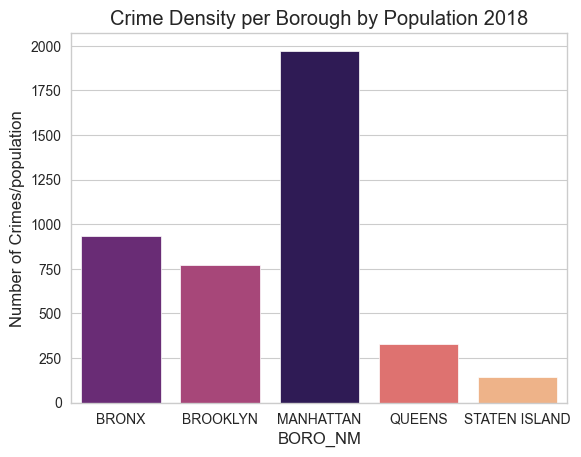

In [22]:
# crime density by population in 2018
borough_pop_18 = {'BROOKLYN':2582830, 'STATEN ISLAND':476179, 'BRONX':1432130, 'QUEENS':2278910, 'MANHATTAN':1628700}
df3 = df[(df['BORO_NM']!='UNKNOWN') & (df['year']==2018)].groupby(['BORO_NM'])['CMPLNT_NUM'].count().reset_index()
#adding information about area per borough
df3['Population18'] = df3.apply(transform, val_dict=borough_area, column='BORO_NM', axis=1);
#calculating crime density
df3['CrimeDensityPop'] = df3.CMPLNT_NUM / df3.Population18
data = df3['CrimeDensityPop']
palette = sns.color_palette("magma",5)
rank = data.argsort().argsort()
sns.set_style('whitegrid');
g=sns.barplot(x='BORO_NM',y='CrimeDensityPop',data=df3,palette=np.array(palette[::-1])[rank]);
plt.ylabel('Number of Crimes/population');
plt.title("Crime Density per Borough by Population 2018");

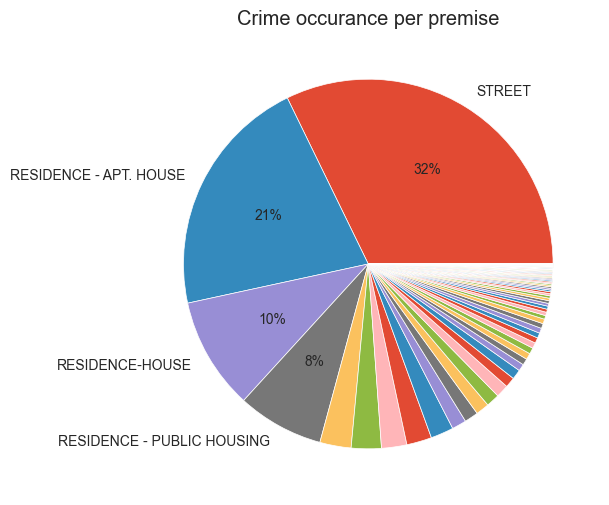

In [12]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=df['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

# When

Text(0.5, 1.0, 'Crime evolution : last decade')

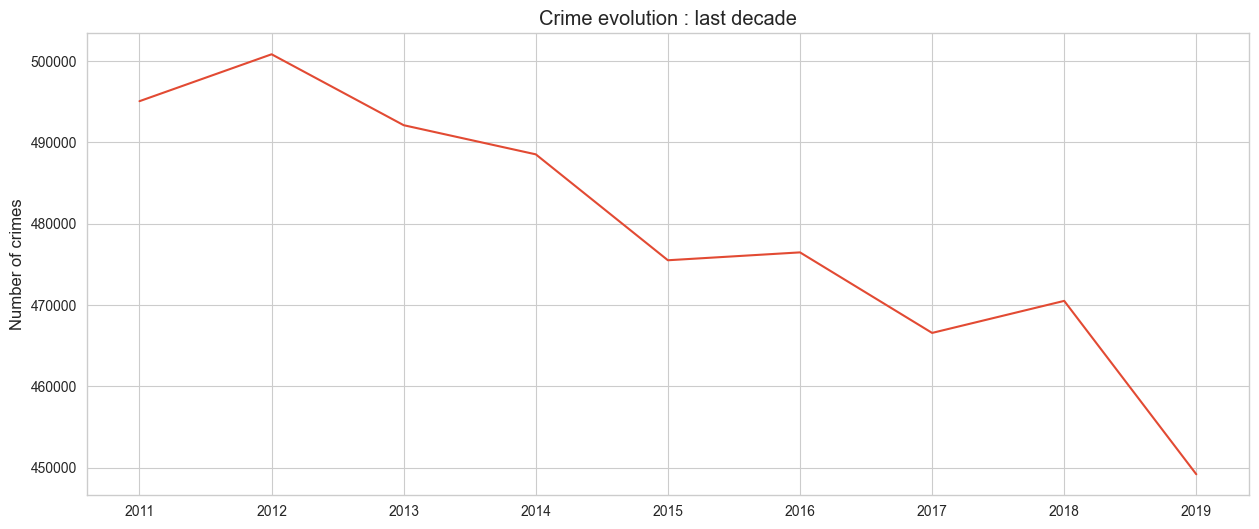

In [14]:
# Crime distribution per year
fig= plt.figure(figsize=(15,6))
temp_df = df[df["year"]>2010]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution : last decade')

Text(0.5, 1.0, 'Crimes per month')

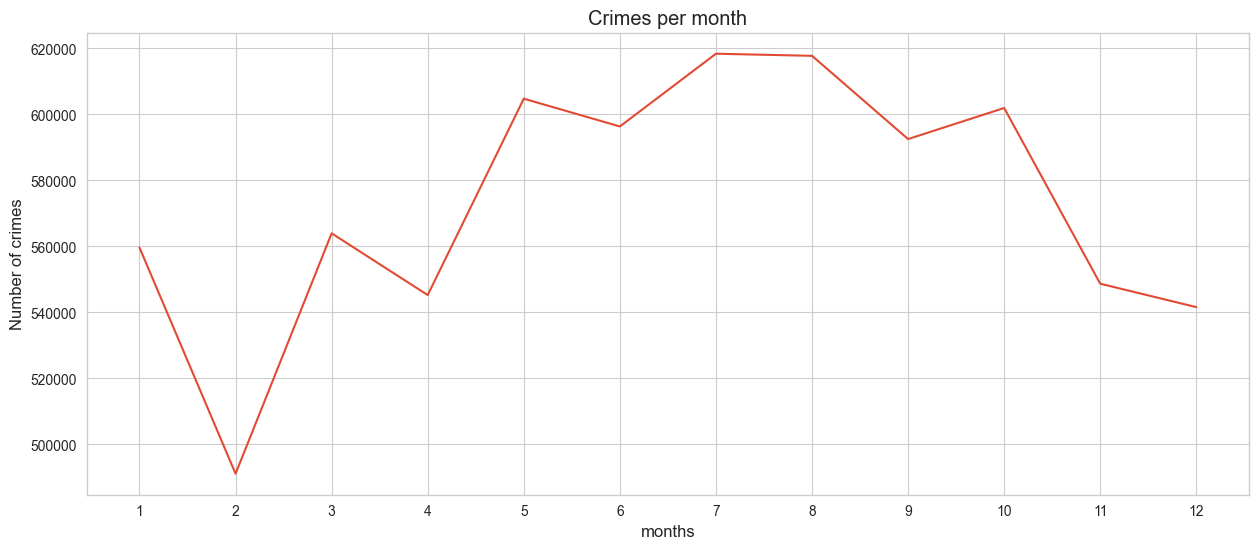

In [15]:
# Crime distribution per month
fig= plt.figure(figsize=(15,6))
df.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

Text(0.5, 1.0, 'Crimes per week days')

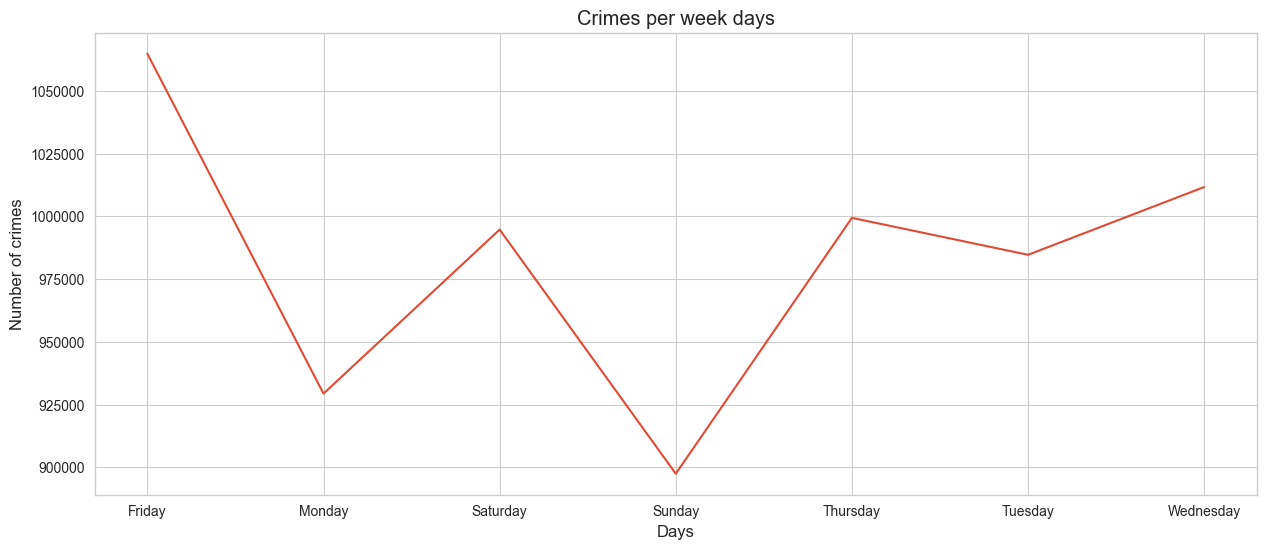

In [16]:
# Crime distribution per week days
fig= plt.figure(figsize=(15,6))
df.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

Text(0.5, 1.0, 'Crimes per hour')

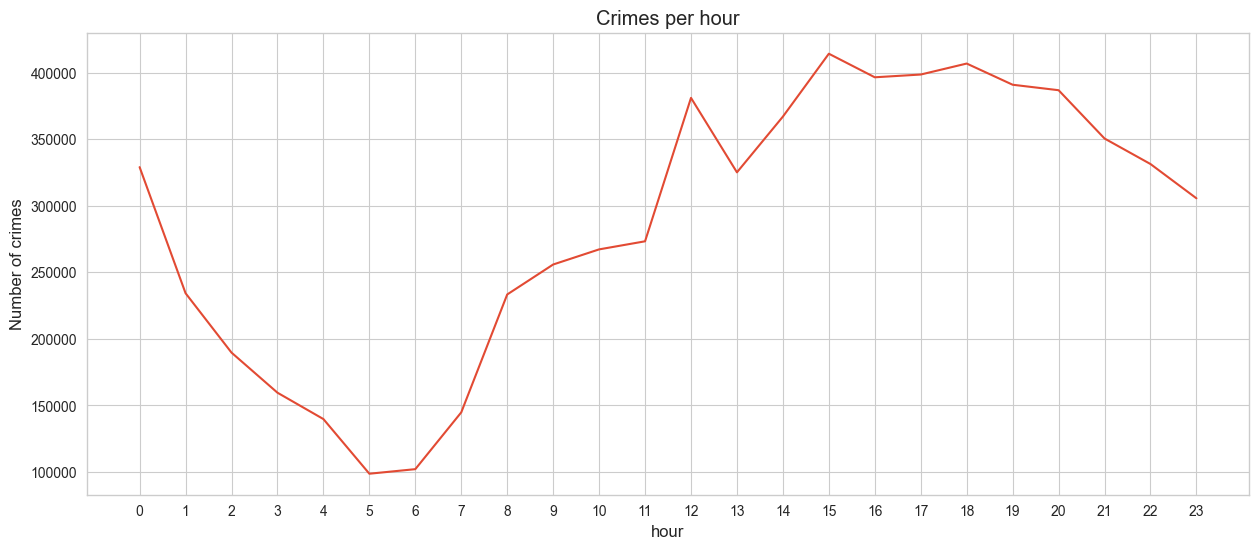

In [20]:
# Crime distribution per hour
fig= plt.figure(figsize=(15,6))
df.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

In [23]:
df.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,CRM_ATPT_CPTD_CD,OFNS_DESC,...,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,2014,9,4,Thursday,17,40.685041,-73.921777,COMPLETED,ASSAULT 3 & RELATED OFFENSES,...,STREET,0,0,0,UNKNOWN,UNKNOWN,U,25-44,WHITE,F
1,191133903,2016,10,12,Wednesday,7,40.636991,-74.134093,COMPLETED,GRAND LARCENY,...,STREET,0,0,0,UNKNOWN,BLACK,U,45-64,WHITE HISPANIC,F
2,720151206,2012,9,28,Friday,13,40.823876,-73.891863,COMPLETED,GRAND LARCENY,...,STREET,0,0,0,UNKNOWN,WHITE HISPANIC,M,45-64,WHITE HISPANIC,F
3,232242098,2015,3,24,Tuesday,15,40.845707,-73.910398,COMPLETED,PETIT LARCENY,...,STREET,0,0,0,UNKNOWN,BLACK,M,<18,WHITE HISPANIC,F
4,708078702,2017,5,20,Saturday,4,40.763992,-73.828426,COMPLETED,ASSAULT 3 & RELATED OFFENSES,...,STREET,0,0,0,25-44,WHITE HISPANIC,M,25-44,BLACK,M
